# Pattern Recognition Assignment 3
Lioupis Theodoros 9733
Stavrianidou Evgenia 9686

## Import Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sympy as sym
import math
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import sys
np.set_printoptions(threshold=sys.maxsize)

## Part A

### Question 1


The Decision Tree Classifier confusion matrix and accuracy with tree depth = 3 is:
Confusion Matrix:
[[28  1  0]
 [ 0 16  7]
 [ 0  8 15]]
Accuracy:
0.79

The Decision Tree Classifier confusion matrix and accuracy with tree depth = 4 is:
Confusion Matrix:
[[28  1  0]
 [ 0 15  8]
 [ 0  8 15]]
Accuracy:
0.77

The Decision Tree Classifier confusion matrix and accuracy with tree depth = 5 is:
Confusion Matrix:
[[28  1  0]
 [ 0 15  8]
 [ 0  8 15]]
Accuracy:
0.77

The Decision Tree Classifier confusion matrix and accuracy with tree depth = 6 is:
Confusion Matrix:
[[28  1  0]
 [ 0 15  8]
 [ 0  8 15]]
Accuracy:
0.77

The Decision Tree Classifier confusion matrix and accuracy with tree depth = 7 is:
Confusion Matrix:
[[28  1  0]
 [ 0 13 10]
 [ 0  8 15]]
Accuracy:
0.75

The Decision Tree Classifier confusion matrix and accuracy with tree depth = 8 is:
Confusion Matrix:
[[28  1  0]
 [ 0 14  9]
 [ 0 10 13]]
Accuracy:
0.73


We see that we have the maximum accuracy for tree depth = 3 (accuracy = 0.

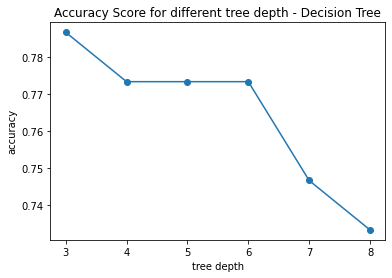

In [25]:
#importing the iris dataset from sklearn
iris = datasets.load_iris()
X = iris.data[:, :2]  #we only take the first two features, Sepal Length, Sepal Width
y = iris.target #3 possible classes: Setosa = 0 , Versicolour = 1 , Virginica = 2

#randomly splitting the data to training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42) 

tree_depth = np.arange(3,9,1) #the maximum depth for the Decision Tree Classifier, trying different depths
score = [] #to store the accuracy scores for each depth
for i in range(0,len(tree_depth)): #create the classifier for each tree depth
  classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = tree_depth[i]) #instance of DecisionTreeClassifier class
  classifier.fit(X_train, y_train) #train the classifier on our training data set
  y_pred = classifier.predict(X_test) #testing the model of the classifier on our testing data set

  cm = confusion_matrix(y_test,y_pred) #calculating the confusion matrix
  score.append(accuracy_score(y_test,y_pred)) #the accuracy of the classifier
  print('\nThe Decision Tree Classifier confusion matrix and accuracy with tree depth =', round(tree_depth[i]),'is:')
  print('Confusion Matrix:')
  print(cm)
  print('Accuracy:')
  print(round(score[i],2)) #printing the accuracy of the classifier

#plot the accuracy of each tree depth
plt.title('Accuracy Score for different tree depth - Decision Tree')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.scatter(tree_depth,score)
plt.plot(tree_depth,score)

print('\n\nWe see that we have the maximum accuracy for tree depth = 3 (accuracy = 0.79) and less but constasnt accuracy for depths 4,5,6 (accuracy = 0.77)')

###Question 2

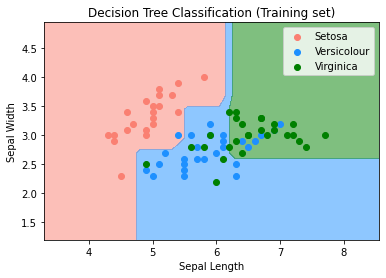

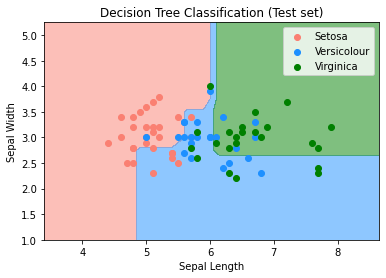

In [26]:
#we have maximum accuracy for depth = 3 so we remake the model for that depth
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 3) #instance of DecisionTreeClassifier class
classifier.fit(X_train, y_train) #train the classifier on our training data set
y_pred = classifier.predict(X_test) #testing the model of the classifier on our testing data set

#plotting the results for the training set (decision boundaries) - decision tree
iris_labels = ['Setosa','Versicolour','Virginica']
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                        alpha = 0.5, levels = 2, cmap = ListedColormap(('salmon', 'dodgerblue','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],  c = ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label = iris_labels[j])
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
#plotting the results for the test set (decision boundaries) - decision tree
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                        alpha = 0.5, levels = 2, cmap = ListedColormap(('salmon', 'dodgerblue','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_train[y_test == j, 1],  c = ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label = iris_labels[j])
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

##Part B

###Question 1

The Random Forest Classifier confusion matrix and accuracy with tree depth = 3 is:
[[29  0  0]
 [ 0 16  7]
 [ 0  8 15]]
0.8
The Random Forest Classifier confusion matrix and accuracy with tree depth = 4 is:
[[28  1  0]
 [ 0 16  7]
 [ 0  7 16]]
0.8
The Random Forest Classifier confusion matrix and accuracy with tree depth = 5 is:
[[29  0  0]
 [ 0 15  8]
 [ 0  7 16]]
0.8
The Random Forest Classifier confusion matrix and accuracy with tree depth = 6 is:
[[26  3  0]
 [ 0 15  8]
 [ 0  8 15]]
0.75
The Random Forest Classifier confusion matrix and accuracy with tree depth = 7 is:
[[28  1  0]
 [ 0 15  8]
 [ 0  8 15]]
0.77


We see that we have the maximum accuracy for tree depth = 3,4,5 (accuracy = 0.8) and less for depths 6 and 7.


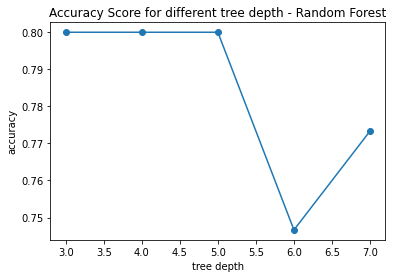

In [27]:
np.random.seed(10) #setting random seed so we can have the same results when we re run the cell
B = 100 #100 bootstrap samples
g = 0.5 #to determine the length of the bootstrap sample
tree_depth = np.arange(3,8,1) #the maximum depth for the Random Forest Classifier, trying different depths
tree_classifiers = [] #a list to store each tree classifier of the random forest

#a function to create and train a random forest
def random_forest_fit(B,g,X_train,y_train,tree_depth):
  #random forest training implementation
  for i in range(0, B):
    #create a bootstrap sample
    bs_indeces = np.random.choice(len(X_train), round(g*len(X_train)), replace = True) #produce random indeces allowing duplicates
    bs_X_train = X_train[bs_indeces] #bootstrap X train
    bs_y_train = y_train[bs_indeces] #bootstrap y train
    #create tree classifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = None, max_depth = tree_depth) #instance of DecisionTreeClassifier class
    tree_classifiers.append(classifier)
    tree_classifiers[i].fit(bs_X_train, bs_y_train) #train the tree classifier on our bootstrap training data set

#a function to predict the result of the random forest
def random_forest_predict(B,X_test):
  y_pred_tree = np.empty(shape=(B, len(X_test))) #to store the predictions of each tree inside the random forest
  for i in range(0, B):
    y_pred_tree[i] = tree_classifiers[i].predict(X_test) #store the y prediction for X_test from each tree

  y_pred_forest = np.empty(shape=(1, len(X_test))) #to store the final predictions of the random forest

  #counting the votes of each tree and keeping the majority vote
  for i in range(0,len(X_test)):
    zero_count = 0;
    one_count = 0;
    two_count = 0;
    for j in range(0,B):
      if(y_pred_tree[j][i] == 0):
        zero_count = zero_count + 1;
      if(y_pred_tree[j][i] == 1):
        one_count = one_count + 1
      if(y_pred_tree[j][i] == 2):
        two_count = two_count + 1
    if (zero_count >= one_count) and (zero_count >= two_count):
      major = 0;
    elif (one_count >= zero_count) and (one_count >= two_count):
      major = 1;
    else:
      major = 2;
    y_pred_forest[0][i] = major #create a new array to store the major prediction

  return y_pred_forest

#testing the tree depths to find the most accurate
score = [] #to store the accuracy scores for each depth
for i in range(0,len(tree_depth)):
  random_forest_fit(B,g,X_train,y_train,tree_depth[i]) #train the random forest
  y_pred_forest = random_forest_predict(B,X_test) #test the random forest
  cm = confusion_matrix(y_test,y_pred_forest[0]) #calculating the confusion matrix
  score.append(accuracy_score(y_test,y_pred_forest[0])) #the accuracy of the classifier
  print('The Random Forest Classifier confusion matrix and accuracy with tree depth =', round(tree_depth[i]),'is:')
  print(cm)
  print(round(score[i],2)) #printing the accuracy of the classifier

plt.title('Accuracy Score for different tree depth - Random Forest')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.scatter(tree_depth,score)
plt.plot(tree_depth,score)

print('\n\nWe see that we have the maximum accuracy for tree depth = 3,4,5 (accuracy = 0.8) and less for depths 6 and 7.')

###Question 2

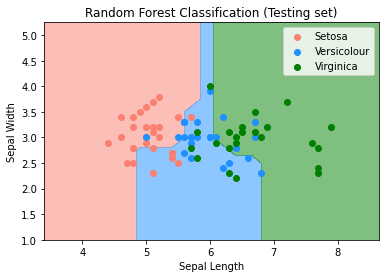


We see that the blue and green decision areas (Versicolour, Virginica) are separated in a better way here, in comparison with the Tree Decision Classifier.
The Random Forest classifier considers the area with Sepal Width < 2.7 and Sepal Length > 6.8 as Virginica, which is accurate for the Testing set values.


In [28]:
np.random.seed(10)
tree_depth = 4
random_forest_fit(B,g,X_train,y_train,tree_depth) #we have maximum accuracy for depth = 4 so we remake the model for that depth

#plotting the results for the test set (decision boundaries) - random forest
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, random_forest_predict(B,np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                        alpha = 0.5, levels = 2, cmap = ListedColormap(('salmon', 'dodgerblue','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_train[y_test == j, 1],  c = ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label = iris_labels[j])
plt.title('Random Forest Classification (Testing set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

print('\nWe see that the blue and green decision areas (Versicolour, Virginica) are separated in a better way here, in comparison with the Tree Decision Classifier.')
print('The Random Forest classifier considers the area with Sepal Width < 2.7 and Sepal Length > 6.8 as Virginica, which is accurate for the Testing set values.')

###Question 3



The Random Forest Classifier accuracy with g = 0.1 is: 0.8
The Random Forest Classifier accuracy with g = 0.2 is: 0.83
The Random Forest Classifier accuracy with g = 0.3 is: 0.81
The Random Forest Classifier accuracy with g = 0.4 is: 0.77
The Random Forest Classifier accuracy with g = 0.5 is: 0.79
The Random Forest Classifier accuracy with g = 0.6 is: 0.76
The Random Forest Classifier accuracy with g = 0.7 is: 0.79
The Random Forest Classifier accuracy with g = 0.8 is: 0.75
The Random Forest Classifier accuracy with g = 0.9 is: 0.79


We see that, for lower g we get better results (accuracy), because the bootstrap samples are more irrelevant.


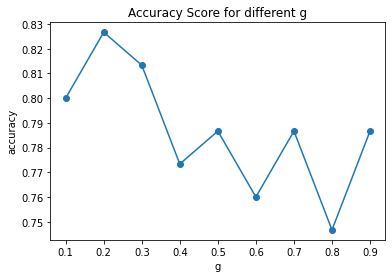

In [29]:
np.random.seed(10)
g = np.arange(0.1,1,0.1) #to test multiple g values
score = [] #to score the accuracy of each tree by testing the different g values
for i in range(0,len(g)):
  random_forest_fit(B,g[i],X_train,y_train,tree_depth)
  y_pred_forest = random_forest_predict(B,X_test)
  score.append(accuracy_score(y_test,y_pred_forest[0]))
  print('The Random Forest Classifier accuracy with g =', round(g[i],1),'is:', round(score[i],2)) #printing the accuracy of the classifier

plt.title('Accuracy Score for different g')
plt.xlabel('g')
plt.ylabel('accuracy')
plt.scatter(g,score)
plt.plot(g,score)

print('\n\nWe see that, for lower g we get better results (accuracy), because the bootstrap samples are more irrelevant.')